# **EXPLORATORY DATA ANALYSIS(EDA)**

In [ ]:
data <- read.csv("social_media_cleaned_scaled.csv")
str(data)

'data.frame':	495 obs. of  14 variables:
 $ Happiness                     : num  -1.58 0.766 -0.203 0.698 0.613 ...
 $ FoMO                          : num  0.831 0.585 -1.2 1.014 0.629 ...
 $ Neuroticism                   : num  1.203 0.122 0.122 -1.824 -1.391 ...
 $ Disinhibition                 : num  -2.425 1.813 0.251 1.813 0.697 ...
 $ Openness                      : num  -0.32 0.973 -1.556 0.484 0.973 ...
 $ LifeSatisfaction              : num  -0.722 0.19 0.494 1.406 -1.027 ...
 $ Honesty                       : num  -2.147 0.675 0.111 1.24 0.111 ...
 $ CyberbullyingVictim           : num  1.4092 0.8071 -1.6459 2.8023 -0.0917 ...
 $ OnlineGamingAddiction         : num  2.123 0.507 -0.867 -0.867 0.895 ...
 $ SocialMediaAddiction          : num  0.49 0.696 -0.747 2.552 -0.334 ...
 $ SocialAddiction_Communication : num  1.449 1.134 -0.945 3.844 0.646 ...
 $ SocialAddiction_ProblematicUse: num  2.036 0.147 -1.117 3.144 1.099 ...
 $ SocialAddiction_Information   : num  0.93 0.93 -0.9

**HISTOGRAM**

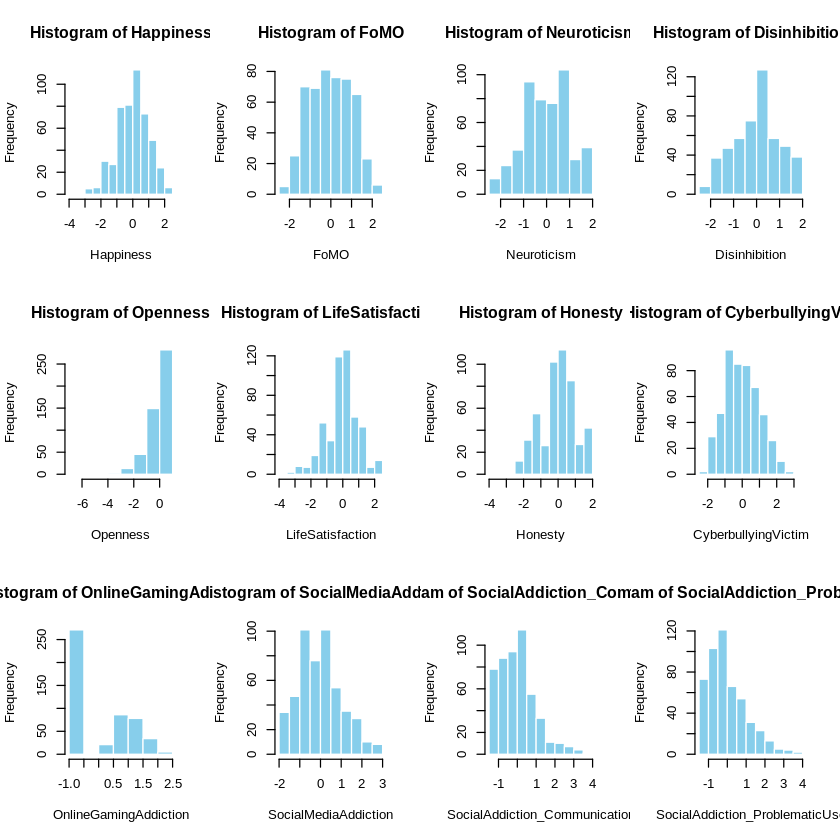

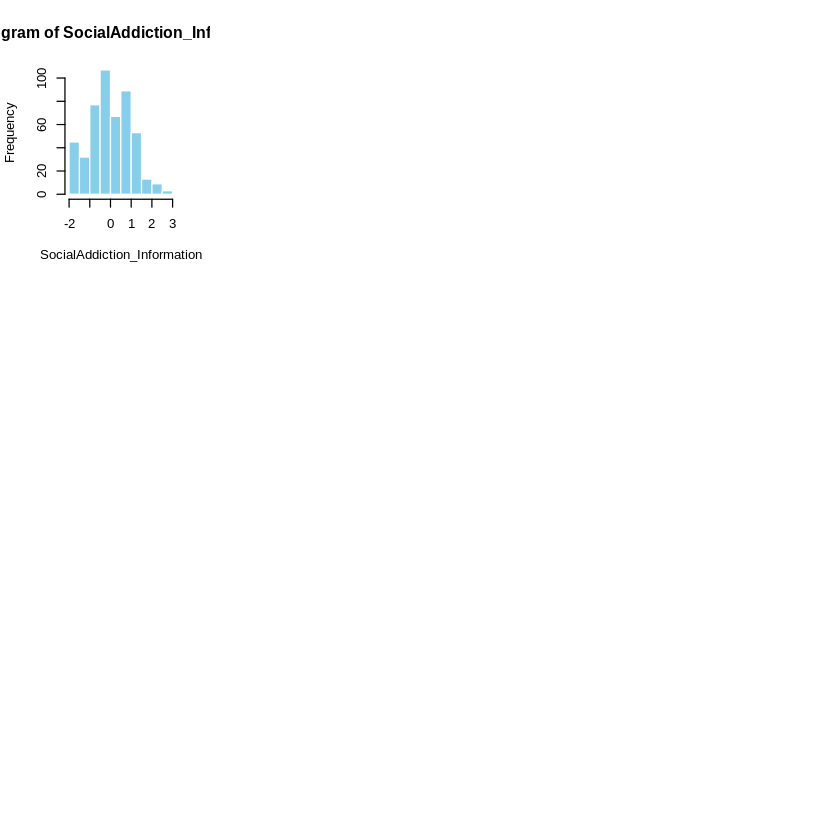

In [ ]:
numeric_cols <- names(data)[sapply(data, is.numeric) & names(data) != "Target"]

par(mfrow = c(3, 4))
for (col in numeric_cols) {
  hist(data[[col]], main = paste("Histogram of", col), xlab = col, col = "skyblue", border = "white")
}
par(mfrow = c(1, 1))  # Reset layout


**BOXPLOTS**

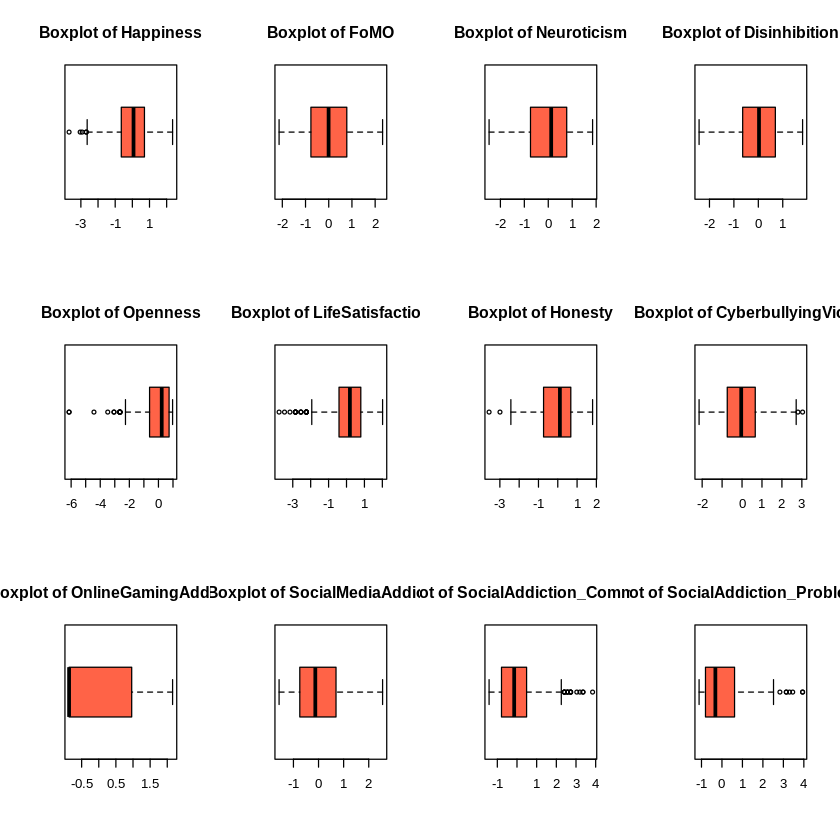

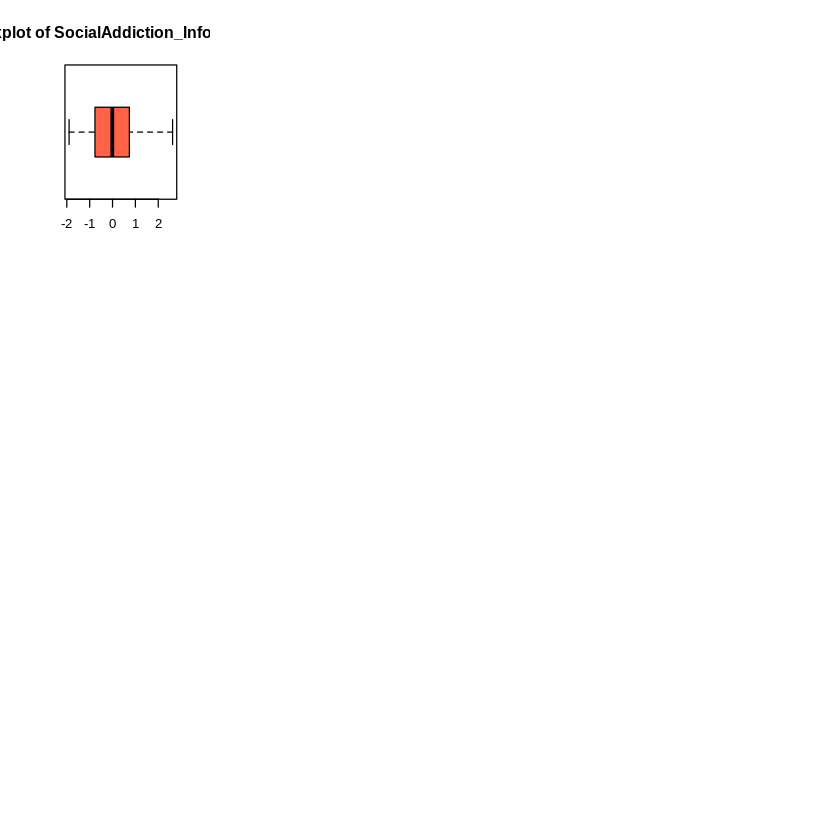

In [ ]:
par(mfrow = c(3, 4))
for (col in numeric_cols) {
  boxplot(data[[col]], main = paste("Boxplot of", col), col = "tomato", horizontal = TRUE)
}
par(mfrow = c(1, 1))


**CORRELATION MATRIX**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



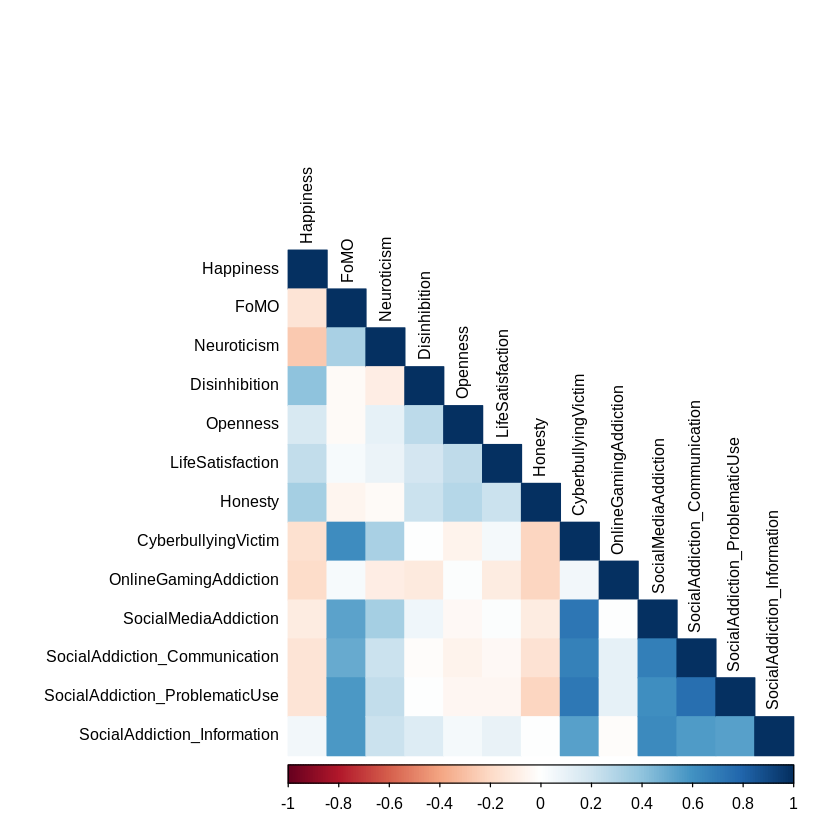

In [ ]:
install.packages("corrplot")
library(corrplot)
cor_matrix <- cor(data[, numeric_cols])
corrplot(cor_matrix, method = "color", type = "lower", tl.col = "black", tl.cex = 0.8)


**PAIRWISE RELATIONSHIPS**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



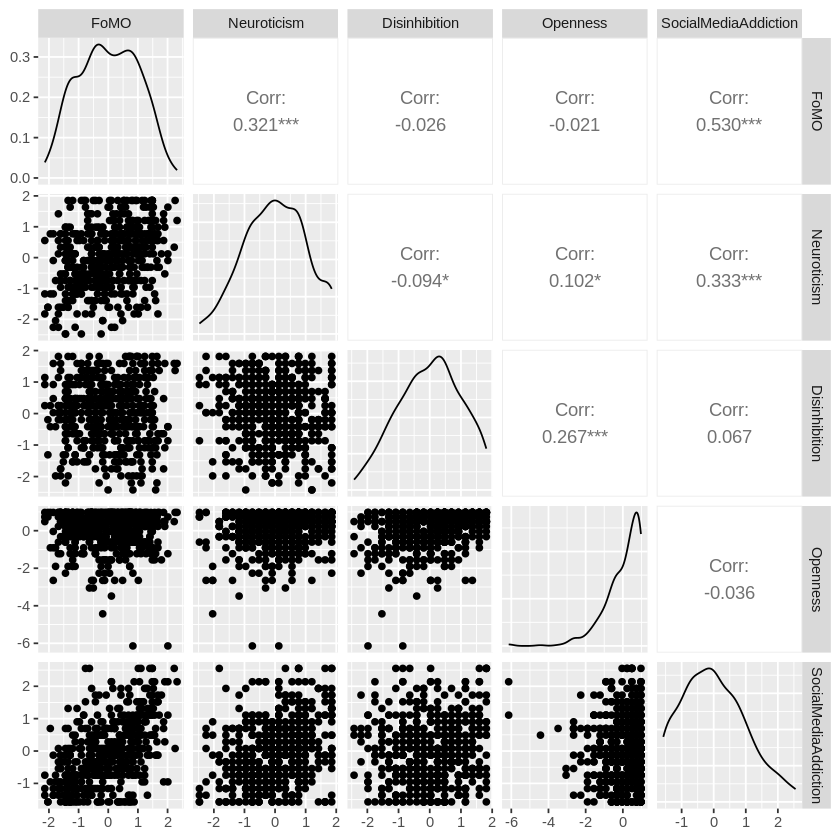

In [ ]:
install.packages("GGally")
library(GGally)
ggpairs(data[, c("FoMO", "Neuroticism", "Disinhibition", "Openness", "SocialMediaAddiction")])

**TARGET DISTRIBUTION**

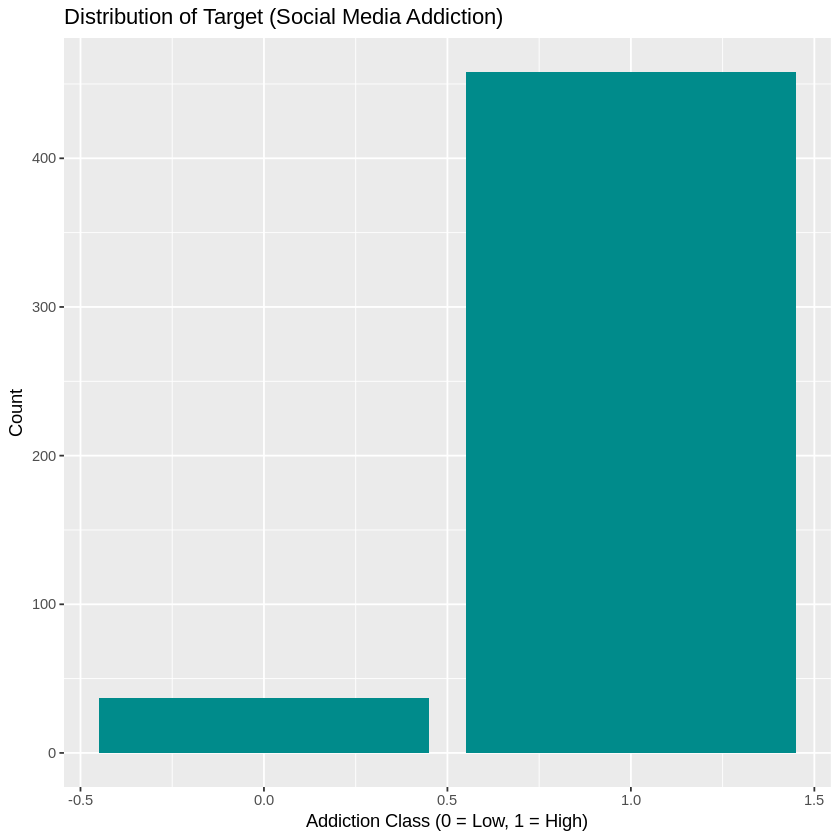

In [ ]:
ggplot(data, aes(x = Target)) +
  geom_bar(fill = "#008B8B") +
  ggtitle("Distribution of Target (Social Media Addiction)") +
  xlab("Addiction Class (0 = Low, 1 = High)") +
  ylab("Count")

**BOXPLOTS: PREDICTORS V/S TARGET**

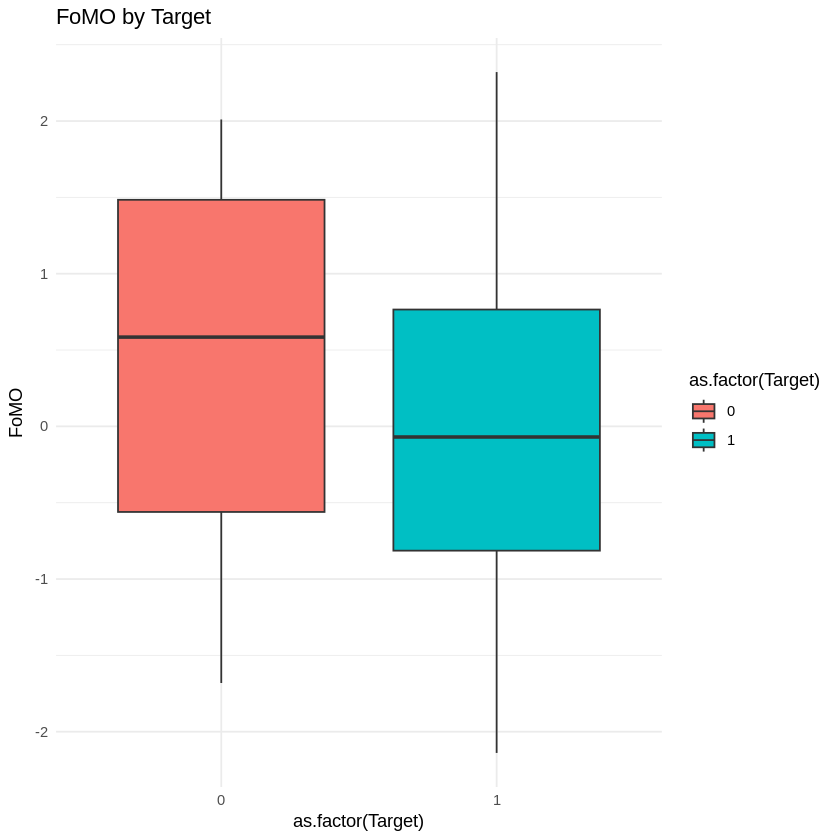

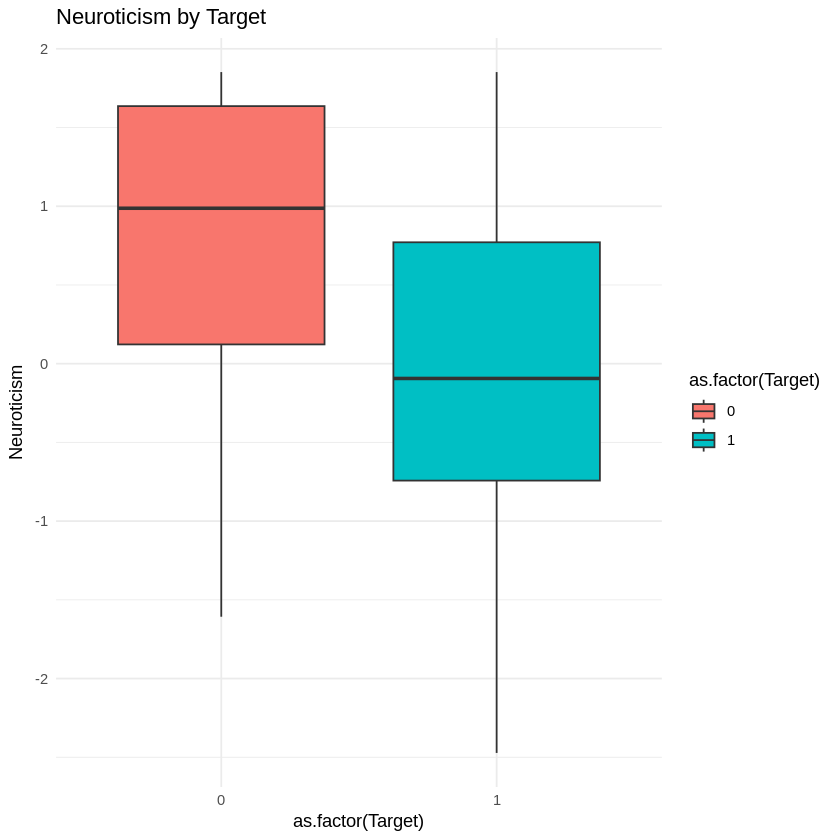

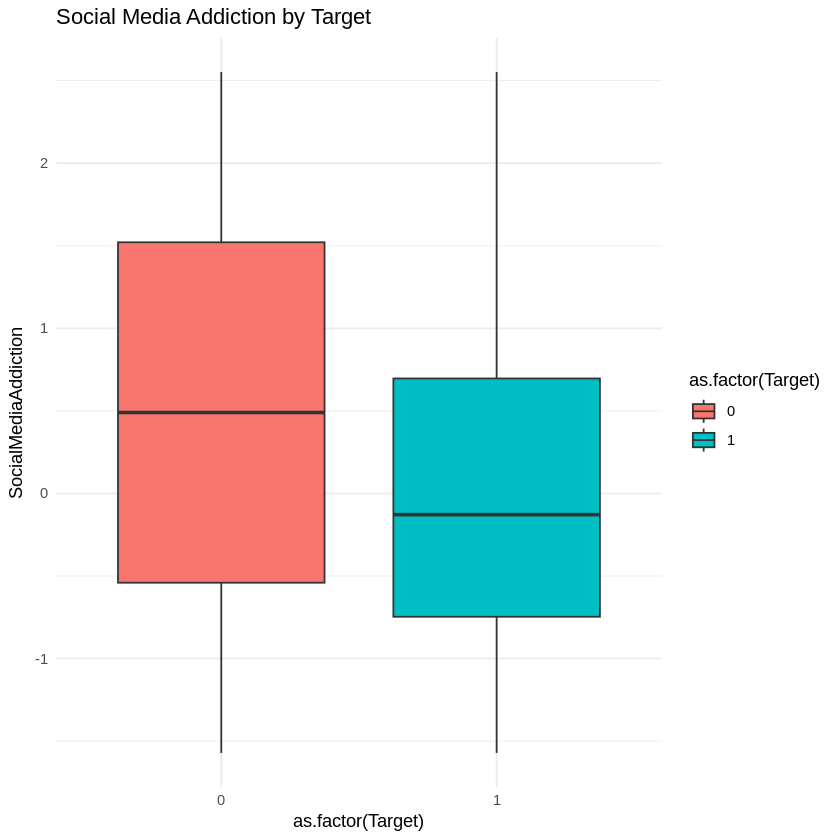

In [ ]:
ggplot(data, aes(x = as.factor(Target), y = FoMO, fill = as.factor(Target))) +
  geom_boxplot() +
  ggtitle("FoMO by Target") +
  theme_minimal()

ggplot(data, aes(x = as.factor(Target), y = Neuroticism, fill = as.factor(Target))) +
  geom_boxplot() +
  ggtitle("Neuroticism by Target") +
  theme_minimal()

ggplot(data, aes(x = as.factor(Target), y = SocialMediaAddiction, fill = as.factor(Target))) +
  geom_boxplot() +
  ggtitle("Social Media Addiction by Target") +
  theme_minimal()

**DENSITY PLOTS FOR KEY FEATURES**

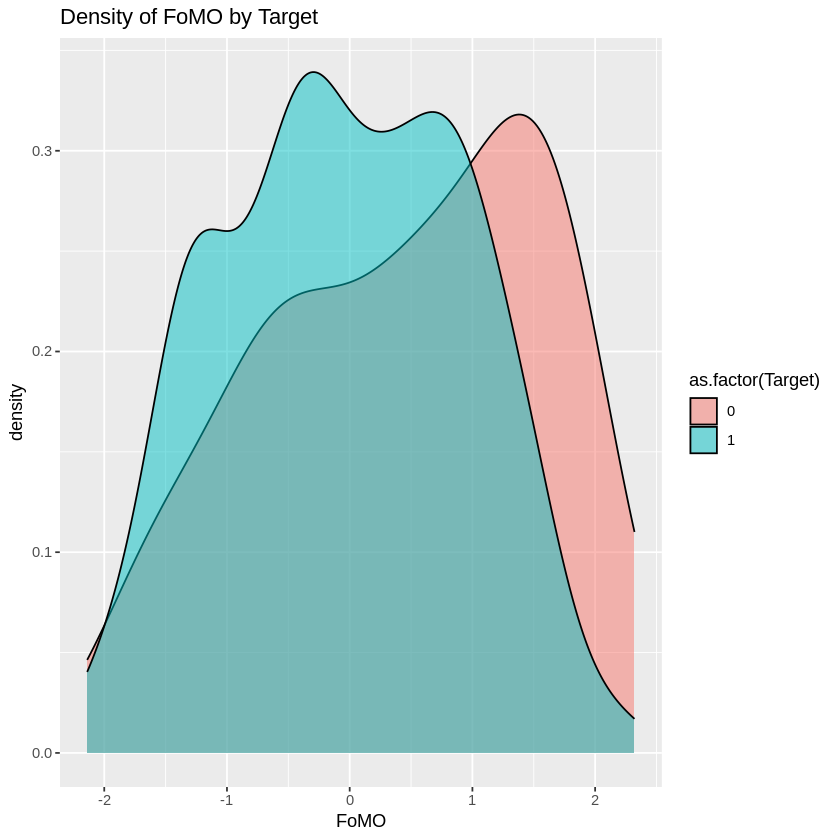

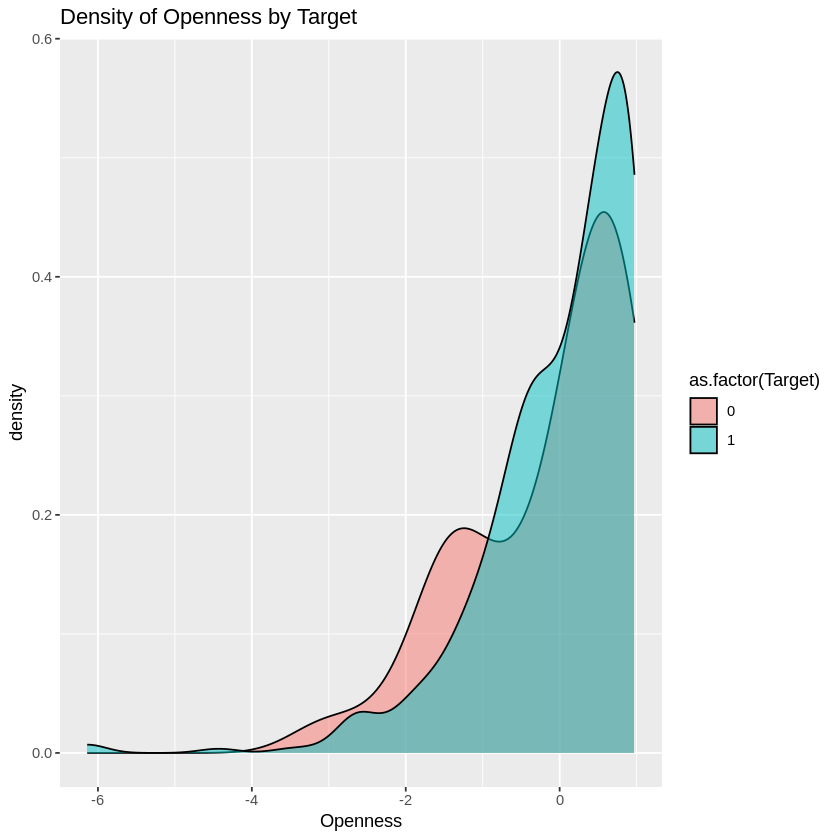

In [ ]:
ggplot(data, aes(x = FoMO, fill = as.factor(Target))) +
  geom_density(alpha = 0.5) +
  ggtitle("Density of FoMO by Target")

ggplot(data, aes(x = Openness, fill = as.factor(Target))) +
  geom_density(alpha = 0.5) +
  ggtitle("Density of Openness by Target")

**PCA**

Reduces high-dimensional data to 2 or 3 components for visualization while preserving variance

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0785 1.4574 1.08486 1.02004 0.89078 0.86106 0.75601
Proportion of Variance 0.3323 0.1634 0.09053 0.08004 0.06104 0.05703 0.04397
Cumulative Proportion  0.3323 0.4957 0.58623 0.66627 0.72731 0.78434 0.82831
                          PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     0.7175 0.70241 0.66364 0.58664 0.49198 0.44413
Proportion of Variance 0.0396 0.03795 0.03388 0.02647 0.01862 0.01517
Cumulative Proportion  0.8679 0.90586 0.93974 0.96621 0.98483 1.00000

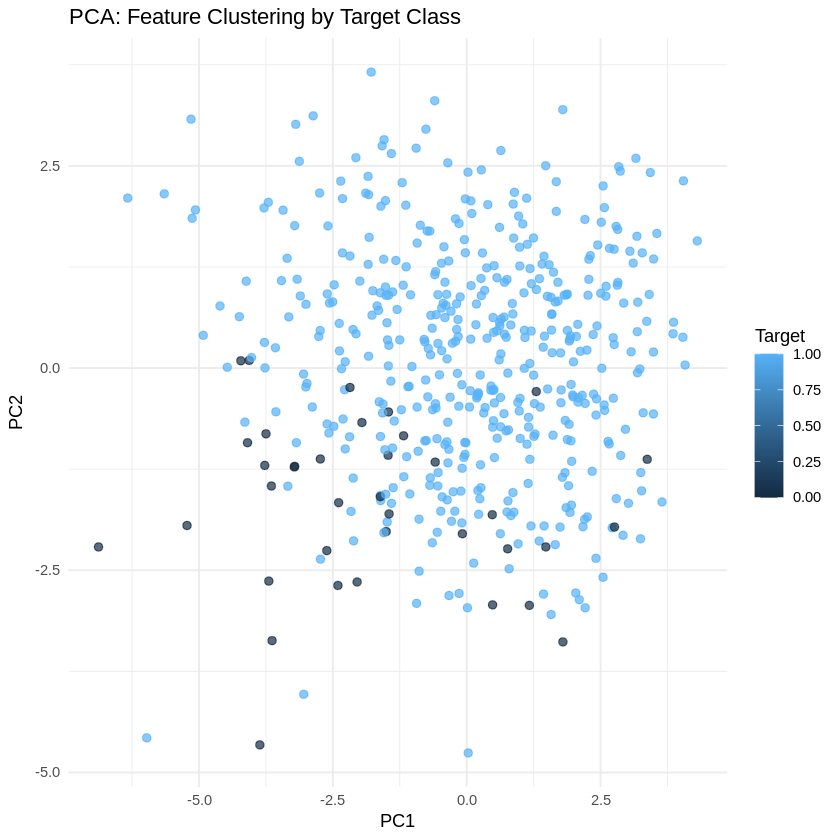

In [ ]:
# Extract only numeric features (excluding target)
features <- data[, sapply(data, is.numeric) & names(data) != "Target"]


pca_result <- prcomp(features, center = TRUE, scale. = TRUE)

# View variance
summary(pca_result)

# Plot first 2 principal components colored by Target
pca_df <- data.frame(pca_result$x[, 1:2], Target = data$Target)

ggplot(pca_df, aes(x = PC1, y = PC2, color = Target)) +
  geom_point(alpha = 0.7, size = 2) +
  labs(title = "PCA: Feature Clustering by Target Class") +
  theme_minimal()


**t-SNE (t-distributed Stochastic Neighbor Embedding)**

nonlinear dimensionality reduction technique for better local structure preservation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Performing PCA
Read the 495 x 13 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.05 seconds (sparsity = 0.248260)!
Learning embedding...
Iteration 50: error is 61.083247 (50 iterations in 0.09 seconds)
Iteration 100: error is 61.081055 (50 iterations in 0.12 seconds)
Iteration 150: error is 61.082333 (50 iterations in 0.11 seconds)
Iteration 200: error is 61.081798 (50 iterations in 0.12 seconds)
Iteration 250: error is 61.088201 (50 iterations in 0.10 seconds)
Iteration 300: error is 1.254157 (50 iterations in 0.07 seconds)
Iteration 350: error is 1.206069 (50 iterations in 0.06 seconds)
Iteration 400: error is 1.189418 (50 iterations in 0.06 seconds)
Iteration 450: error is 1.180301 (50 iterations in 0.06 seconds)
Iteration 500: error is 1.174592 (50 iterations in 0.06 seconds)
Iteration 550: error is 1.173066 (50 iterations in 0.06 seconds)
Iteration 600

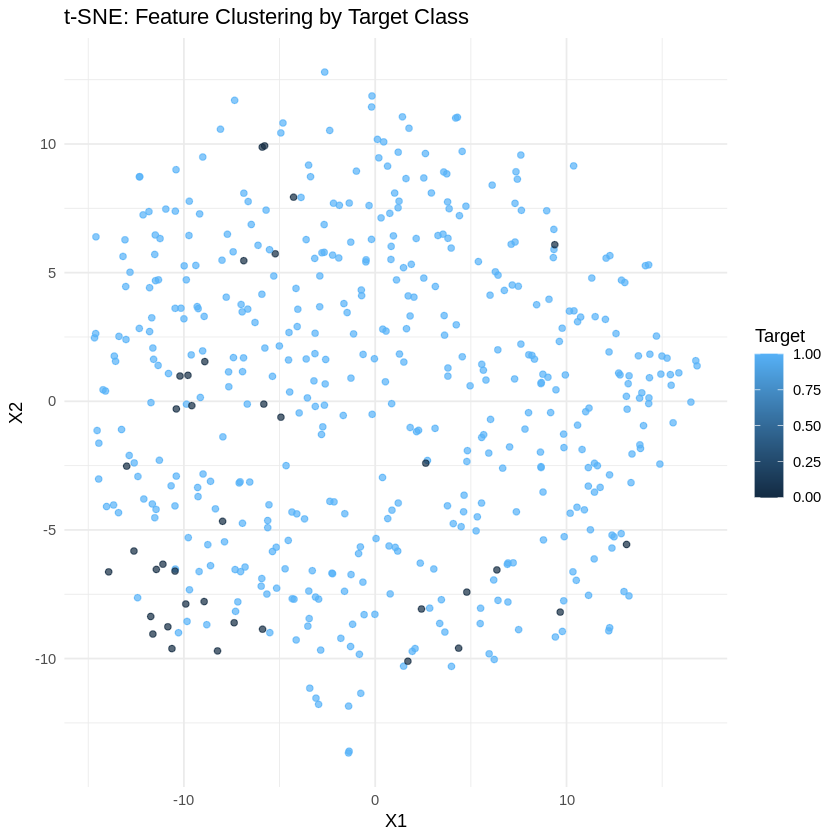

In [ ]:
install.packages("Rtsne")
library(Rtsne)

# Run t-SNE on numeric predictors
tsne_result <- Rtsne(as.matrix(features), dims = 2, perplexity = 30, verbose = TRUE)

# Create data frame for plotting
tsne_df <- data.frame(tsne_result$Y, Target = data$Target)

ggplot(tsne_df, aes(x = X1, y = X2, color = Target)) +
  geom_point(alpha = 0.7) +
  labs(title = "t-SNE: Feature Clustering by Target Class") +
  theme_minimal()


**T-TEST**

* p_value < 0.05: significant mean difference between addiction classes.

* mean_group_0 vs. mean_group_1: higher values indicate association.

In [ ]:
t_test_results <- lapply(names(data)[sapply(data, is.numeric) & names(data) != "Target"], function(col) {
  test <- t.test(data[[col]] ~ data$Target)
  data.frame(
    Feature = col,
    t_statistic = round(test$statistic, 4),
    p_value = round(test$p.value, 6),
    mean_group_0 = round(mean(data[[col]][data$Target == 0]), 4),
    mean_group_1 = round(mean(data[[col]][data$Target == 1]), 4)
  )
})

# Combine results into one data frame
t_test_df <- do.call(rbind, t_test_results)
print("T-test Results:")
print(t_test_df)

[1] "T-test Results:"
                           Feature t_statistic  p_value mean_group_0
t                        Happiness    -24.0777 0.000000      -2.0382
t1                            FoMO      2.4375 0.019260       0.4282
t2                     Neuroticism      5.5869 0.000001       0.8061
t3                   Disinhibition     -3.6221 0.000784      -0.5744
t4                        Openness     -0.6893 0.494482      -0.1144
t5                LifeSatisfaction     -2.2524 0.029471      -0.3362
t6                         Honesty     -5.5033 0.000002      -0.7818
t7             CyberbullyingVictim      4.7962 0.000021       0.7947
t8           OnlineGamingAddiction      1.8914 0.065743       0.3370
t9            SocialMediaAddiction      2.7582 0.008736       0.5236
t10  SocialAddiction_Communication      2.8244 0.007403       0.5659
t11 SocialAddiction_ProblematicUse      3.6063 0.000865       0.7170
t12    SocialAddiction_Information      0.6841 0.497658       0.1090
    mean_gro

**ANOVA**

* Tests whether means differ significantly by target class.

* F_value: Larger values indicate stronger group separation.

In [ ]:
anova_results <- lapply(names(data)[sapply(data, is.numeric) & names(data) != "Target"], function(col) {
  model <- aov(data[[col]] ~ data$Target)
  summary_res <- summary(model)[[1]]
  data.frame(
    Feature = col,
    F_value = round(summary_res["F value"][1, 1], 4),
    p_value = round(summary_res["Pr(>F)"][1, 1], 6)
  )
})

# Combine results
anova_df <- do.call(rbind, anova_results)
print("ANOVA Results:")
print(anova_df)

[1] "ANOVA Results:"
                          Feature  F_value  p_value
1                       Happiness 249.7906 0.000000
2                            FoMO   7.4273 0.006653
3                     Neuroticism  27.3696 0.000000
4                   Disinhibition  13.5286 0.000261
5                        Openness   0.5232 0.469839
6                LifeSatisfaction   4.5517 0.033379
7                         Honesty  25.6646 0.000001
8             CyberbullyingVictim  26.5584 0.000000
9           OnlineGamingAddiction   4.5745 0.032942
10           SocialMediaAddiction  11.1915 0.000884
11  SocialAddiction_Communication  13.1206 0.000322
12 SocialAddiction_ProblematicUse  21.4056 0.000005
13    SocialAddiction_Information   0.4749 0.491058
